# **Gradient Boost and Grid Search**

## *Data Import*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("mushrooms.csv")

## *About Data*

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## *Train Test Split*

In [10]:
X = pd.get_dummies(df.drop("class", axis= 1), drop_first= True)
y = df["class"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 9)

## *Grid Search and GBOOST*

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
parameters = {
    "n_estimators" : [1, 3, 5, 10, 20, 50, 100],
    "max_depth" : [2, 3, 4, 5, 6]
}

In [18]:
grad_boost = GradientBoostingClassifier()

In [19]:
grid = GridSearchCV(grad_boost, parameters)

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [1, 3, 5, 10, 20, 50, 100]})

In [21]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [22]:
mushroom_pred = grid.predict(X_test)

## *Performance*

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

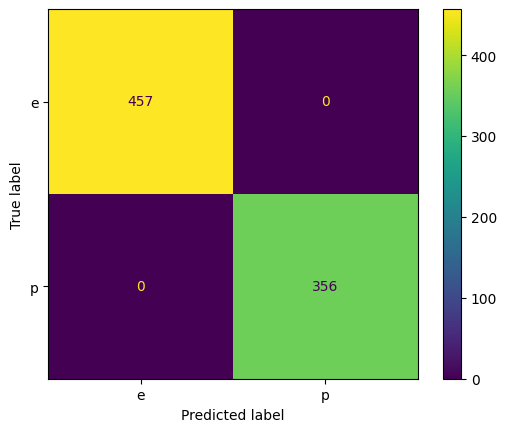

In [24]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [25]:

print(classification_report(y_test, mushroom_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       457
           p       1.00      1.00      1.00       356

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [34]:
feature = grid.best_estimator_.feature_importances_
feature_df = pd.DataFrame(index= X.columns, columns= ["coefficients"], data= feature)
feature_df = feature_df[feature_df["coefficients"] > 0.001].sort_values("coefficients")
feature_df

,coefficients
odor_c,0.001024
ring-type_p,0.001473
cap-surface_g,0.001577
population_c,0.001623
cap-color_y,0.002117
stalk-color-below-ring_y,0.003007
stalk-surface-above-ring_k,0.003237
ring-number_o,0.003505
spore-print-color_u,0.003898
gill-size_n,0.008696


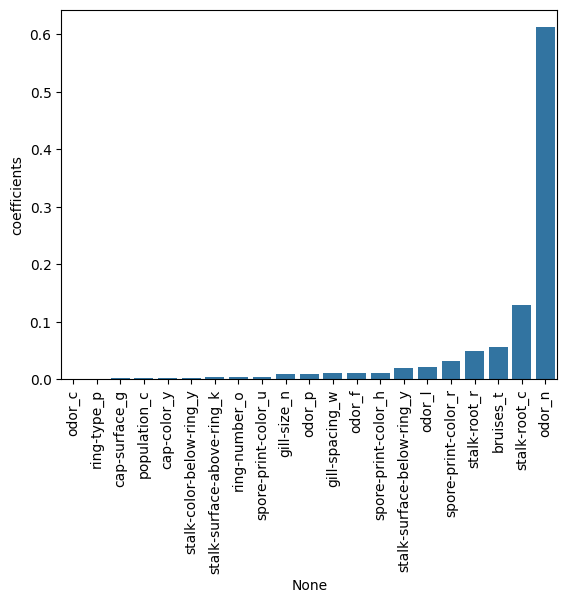

In [35]:
sns.barplot(data= feature_df, x= feature_df.sort_values("coefficients").index, y= "coefficients")
plt.xticks(rotation= 90);